In [ ]:
#Initialisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importation DF et fusion des données



In [ ]:
#Installation de l'accès google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Extraction des fichiers dans le dossier compressé

import zipfile

!unzip drive/MyDrive/DataScientest/Pytmosphere/Data/Pythmosphere-Data-V2.zip

Archive:  drive/MyDrive/DataScientest/Pytmosphere/Data/Pythmosphere-Data-V2.zip
  inflating: Pythmosphere-Data-V2/Data-Final-2010.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2011.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2012.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2013.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2014.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2015.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2016.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2017.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2018.csv  
  inflating: Pythmosphere-Data-V2/Data-Final-2019.csv  
  inflating: Pythmosphere-Data-V2/Data-Provision-2020.csv  
  inflating: Pythmosphere-Data-V2/Data-Provision-2021.csv  


In [ ]:
###################
## MA 25/07/2022 ##
###################
import os
files=os.listdir('Pythmosphere-Data-V2')
##Création d'un dictionnaire contenant toutes les df :

dictdf={}


In [ ]:
#Test taille avec TOUT le jeu de donnée
# Trop lourd : 14 million de lignes !!! 
"""for file in files:
  filename='Pythmosphere-Data-V2/'+file
  data=pd.read_csv(filename, sep=',')  
  dictdf[file]=data
df_TOT=pd.concat(dictdf.values(),ignore_index=True)
df_TOT.shape"""

(13983306, 37)

In [ ]:

#Maxsize : taille limite pour chaque année
#Objectif : avoir un jeu de données plus petit et des calculs plus rapides (et moins de bug RAM)
maxsize=50000
for file in files:
  filename='Pythmosphere-Data-V2/'+file
  data=pd.read_csv(filename, sep=',')
  if data.shape[0]>maxsize:
    #Sample : afin de ne conserver qu'une portion des données pour chaque année
    #La sélection est aléatoire
    #Limite de la taille totale de df
    
    size_sample=maxsize/data.shape[0]
    data=data.sample(frac=size_sample, random_state=311)
  
  dictdf[file]=data



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,11,27,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=pd.concat(dictdf.values(),ignore_index=True)

#### CH ###
## Il y a une fonction "display" de colab qui pourrait être intéressante :
## https://colab.research.google.com/notebooks/data_table.ipynb#scrollTo=IdBulJJa8Jta
## J'ai essayé de le faire, sans succès pour le moment


In [ ]:
df.shape

(600000, 37)

In [ ]:
100*(df.isna().sum())/df.shape[0]

#Avec l'ajout des données de 2018 à 2020, il n'y a plus de variable à 100% de NA. 

Country                  0.000000
VFN                     74.332667
Mp                      19.766667
Mh                       0.000000
Man                      0.002000
MMS                     19.839667
Tan                     13.241667
T                        1.341833
Va                       1.580833
Ve                       3.035833
Mk                       0.931333
Cn                       0.385167
Ct                       0.382500
Cr                      62.839833
r                        0.000000
m (kg)                   0.247333
Mt                      70.852000
Enedc (g/km)             7.000833
Ewltp (g/km)            69.606167
W (mm)                   2.568500
At1 (mm)                 4.701500
At2 (mm)                11.001833
Ft                       0.433333
Fm                       1.942333
ec (cm3)                 2.959333
ep (KW)                 23.095500
z (Wh/km)               97.441833
IT                      87.930500
Ernedc (g/km)           92.043667
Erwltp (g/km) 

# Data Processing









L'import de tous les dataframes fait planter Google Colab "Toute la RAM disponible a été utilisée - Essayer Google Colab Pro"

Idée : Suppression des colonnes inutiles sur Excel "à la main" ?

-> Problème résolu (suppression doublons en local puis importation des nouveaux fichiers)


In [ ]:
#####################
#Code Hai 17/07/2022#
#####################
df_10=dictdf['Data-Final-2010.csv']
df_11=dictdf['Data-Final-2011.csv']
df_12=dictdf['Data-Final-2012.csv']
df_13=dictdf['Data-Final-2013.csv']
df_14=dictdf['Data-Final-2014.csv']
df_15=dictdf['Data-Final-2015.csv']
df_16=dictdf['Data-Final-2016.csv']
df_17=dictdf['Data-Final-2017.csv']
dfx = pd.concat([df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17])
### ATTENTION ne pas utiliser ce df par la suite, uniquement OK dans cette cellule 
### Manque data 2018-2021

#Comparaison du nombre de ligne (tableau fusionné vs tableaux individuels)
print("Nombre de lignes du tableau fusionné est de",len(dfx.index))
print("Nombre de lignes total des tableaux 2010 - 2017 est de",
      len(df_10.index)+ len(df_11.index)+ len(df_12.index)+ len(df_13.index)+ len(df_14.index)+ len(df_15.index)+ len(df_16.index)+ len(df_17.index))

# Même nombre de ligne => table fusionnée contient l'ensemble des observations

##########################################################################
#Fonction pour vérifier le nombre des valeurs manquantes pour les colonnes
##########################################################################

def missing(data):
    lst=[]
    for i in range(0,37):
        missing_number = data.iloc[:,i].isnull().sum()
        lst.append(missing_number)
    return(lst)
    
#Nombre de valeurs manquantes 2010 - 2017 par colonne/variable
  
vector10 = np.array((missing(df_10)))
vector11 = np.array((missing(df_11)))
vector12 = np.array((missing(df_12)))
vector13 = np.array((missing(df_13)))
vector14 = np.array((missing(df_14)))
vector15 = np.array((missing(df_15)))
vector16 = np.array((missing(df_16)))
vector17 = np.array((missing(df_17)))

#Nombre de valeurs manquantes totales 2010 - 2017 par colonne/variable
sum_vector = vector10 + vector11+ vector12+ vector13+ vector14+ vector15+ vector16+ vector17
sum_vector

#Nombre de valeurs manquantes 2010 - 2017 de la table fusionnée
vector_fusion = np.array((missing(dfx)))

#Ecart entre deux tables 
print("Ecart", vector_fusion - sum_vector)

#Tous les écarts sont nuls pour l'ensemble des variables
#Conclusion: Aucun écart entre le nombre de valeurs manquantes observées sur la table fusionnée et les tables individuelles 


Nombre de lignes du tableau fusionné est de 400000
Nombre de lignes total des tableaux 2010 - 2017 est de 400000
Ecart [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Proposition de modification MA le 25/07 : boucle for avec dictionnaire

##########################################################################
#Fonction pour vérifier le nombre des valeurs manquantes pour les colonnes
##########################################################################

def missing(data):
    lst=[]
    for i in range(0,37):
        missing_number = data.iloc[:,i].isnull().sum()
        lst.append(missing_number)
    return(lst)

missTot=[]

for key, value in dictdf.items(): 
  dat=value
  miss = np.array((missing(dat)))
  missTot.append(miss)

sum_vector=sum(missTot)

vector_fusion = np.array((missing(df)))
#Ecart entre deux tables 
print("Ecart", vector_fusion - sum_vector)

Ecart [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#####################
#CH 20/07/2022#
#####################

# Information sur notre dataframe fusionné
df.info()

# Description sur notre dataframe fusionné
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Country               600000 non-null  object 
 1   VFN                   154004 non-null  object 
 2   Mp                    481400 non-null  object 
 3   Mh                    600000 non-null  object 
 4   Man                   599988 non-null  object 
 5   MMS                   480962 non-null  object 
 6   Tan                   520550 non-null  object 
 7   T                     591949 non-null  object 
 8   Va                    590515 non-null  object 
 9   Ve                    581785 non-null  object 
 10  Mk                    594412 non-null  object 
 11  Cn                    597689 non-null  object 
 12  Ct                    597705 non-null  object 
 13  Cr                    222961 non-null  object 
 14  r                     600000 non-null  int64  
 15  

,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),z (Wh/km),Ernedc (g/km),Erwltp (g/km),De,Vf,year,Fuel consumption,Electric range (km)
count,600000.000000,598516.000000,174888.000000,557995.000000,182363.000000,584589.000000,571791.000000,533989.000000,582244.000000,461427.000000,15349.000000,47738.000000,23988.000000,10992.000000,20300.000000,600000.000000,31923.000000,10789.000000
mean,24.219248,1563.172124,1741.911257,138.509983,148.332869,2706.463257,1571.301049,1560.563521,1853.478093,119.420766,183.331683,1.863122,1.515716,0.010680,0.011921,2015.500000,5.663680,148.523218
std,210.282462,321.731539,345.546636,41.634982,48.862117,247.287279,141.226418,89.284706,665.849816,58.152334,73.820797,0.823357,0.511220,0.047608,0.108534,3.452055,1.969409,151.237038
min,1.000000,83.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,-0.970000,0.000000,2010.000000,0.600000,20.000000
25%,1.000000,1348.000000,1495.000000,115.000000,131.000000,2601.000000,1531.000000,1520.000000,1461.000000,84.000000,152.000000,1.200000,1.100000,0.000000,0.000000,2012.750000,4.900000,52.000000
50%,1.000000,1525.000000,1704.000000,134.000000,149.000000,2690.000000,1559.000000,1559.000000,1798.000000,110.000000,168.000000,1.600000,1.600000,0.012000,0.000000,2015.500000,5.500000,64.000000
75%,4.000000,1735.000000,1936.000000,157.000000,172.000000,2817.000000,1592.000000,1593.000000,1995.000000,140.000000,208.000000,2.500000,1.900000,0.022000,0.000000,2018.250000,6.400000,252.000000
max,30703.000000,7731.000000,3230.000000,953.000000,506.000000,5685.000000,4325.000000,4903.000000,9592.000000,1506.000000,1740.000000,6.400000,6.200000,2.390000,1.000000,2021.000000,73.700000,771.000000


On voit que dans la ligne "count" de notre tableau describe, nous n'avons pas les mêmes valeurs.
Autrement dit, nous avons des valeurs manquantes pour certaines colonnes.

In [ ]:
df.isnull().sum()

Country                      0
VFN                     445996
Mp                      118600
Mh                           0
Man                         12
MMS                     119038
Tan                      79450
T                         8051
Va                        9485
Ve                       18215
Mk                        5588
Cn                        2311
Ct                        2295
Cr                      377039
r                            0
m (kg)                    1484
Mt                      425112
Enedc (g/km)             42005
Ewltp (g/km)            417637
W (mm)                   15411
At1 (mm)                 28209
At2 (mm)                 66011
Ft                        2600
Fm                       11654
ec (cm3)                 17756
ep (KW)                 138573
z (Wh/km)               584651
IT                      527583
Ernedc (g/km)           552262
Erwltp (g/km)           576012
De                      589008
Vf                      579700
Status  

De nombreuses colonnes présentent des valeurs manquantes.
Avant de réfléchir à comment remplacer les valeurs manquantes, nous allons d'abord supprimer les colonnes qui ne sont pas pertinentes pour notre analyse.
Il s'agit des colonnes suivantes : 


*   VFN
*   Mp (idem que Mh, Man, MMS)
*   MMS
*   r







In [ ]:
# Suppression des colonnes non pertinentes

df1=df.drop(columns=['VFN','Man','MMS','r'])  # Pour l'instant je préfère prendre un nouveau dataframe df1 et ne pas écraser df. A voir ensemble
df1.isnull().sum()

Country                      0
Mp                      118600
Mh                           0
Tan                      79450
T                         8051
Va                        9485
Ve                       18215
Mk                        5588
Cn                        2311
Ct                        2295
Cr                      377039
m (kg)                    1484
Mt                      425112
Enedc (g/km)             42005
Ewltp (g/km)            417637
W (mm)                   15411
At1 (mm)                 28209
At2 (mm)                 66011
Ft                        2600
Fm                       11654
ec (cm3)                 17756
ep (KW)                 138573
z (Wh/km)               584651
IT                      527583
Ernedc (g/km)           552262
Erwltp (g/km)           576012
De                      589008
Vf                      579700
Status                       0
year                         0
Date of registration    552236
Fuel consumption        568077
Electric

# 1) Variable country et doublons 

In [ ]:
# On teste la présence de doublons sur la variable country : 

dfTest=df1.drop('Country', axis=1)


In [ ]:
dfTest.duplicated().sum()/dfTest.shape[0]
#Il y a bien des doublons -> suppression de la variable et des doublons

0.03193

In [ ]:
df1=dfTest.drop_duplicates()
#Suppression des doublons après avoir enlevé la variable country
#En effet : plusieurs véhicules identiques peuvent avoir été produits dans des pays différents 
# Mais avoir les mêmes caractéristiques techniques 

# 2) Traitement de la variable 'Man' = Manufacturing Pool

In [ ]:
# # Proportions des valeurs de la variable 'Man'
# list=df['Mh'].tolist()

# col_Mh=[]
# for i in df['Mh']:
#   if i not in col_Mh:
#     col_Mh.append(i)
#   else:
#     pass

# col_Mh
# print(len(col_Mh))


Plusieurs remarques sur cette première variable :

*   Il s'agit du nom de marque du groupe automobile
*   Il manque 2 234 407 valeurs (29% du dataset) à la variable 'Mp'
*   Il en manque beaucoup moins aux variables similaires 'Mh', 'Man', 'MMS', mais ces variables sont plus disparates, et il est difficile de ressortir le groupe automobile
*   Les noms de groupes automobiles se répètent, parce qu'il y a un décalage de virgule, ou de police

Stratégie : 


1.   Supprimer les erreurs de virgule, police, pour regrouper les groupes automobiles de même nom
2.   Essayer de nommer les groupes automobiles manquants. Pour ça, on comparera avec les variables Mk (marque du véhicule) et Mh (Manufacture, sans valeur nulle). Si on a la même marque, on part du principe qu'il s'agit du même groupe automobile







In [ ]:
df1['Mp']=df1['Mp'].replace(['TATA MOTORS JAGUAR LAND ROVER'],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
df1['Mp']=df1['Mp'].replace(['TATA MOTORS LTD, JAGUAR CARS LTD , LAND ROVER '],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
df1['Mp']=df1['Mp'].replace(['TATA MOTORS LTD, JAGUAR CARS LTD , LAND ROVER'],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
df1['Mp']=df1['Mp'].replace(['TJL'],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
df1['Mp']=df1['Mp'].replace(['JLT POOL'],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
df1['Mp']=df1['Mp'].replace(['Toyota-Daihatsu Group'],['TOYOTA-DAHAITSU GROUP'])
df1['Mp']=df1['Mp'].replace(['TOYOTA -DAIHATSU GROUP'],['TOYOTA-DAHAITSU GROUP'])
df1['Mp']=df1['Mp'].replace(['VW Group PC'],['VW GROUP PC'])
df1['Mp']=df1['Mp'].replace(['POOL RENAULT'],['RENAULT NISSAN'])
df1['Mp']=df1['Mp'].replace(['DAIMLER'],['DAIMLER AG'])
df1['Mp']=df1['Mp'].replace(['BMW'],['BMW GROUP'])
df1['Mp']=df1['Mp'].replace(['GM'],['GENERAL MOTORS'])
df1['Mp']=df1['Mp'].replace(['FORD POOL'],['FORD-WERKE GMBH'])
df1['Mp']=df1['Mp'].replace(['FIAT GROUP AUTOMOBILES SPA'],['FCA ITALY SPA'])
df1['Mp']=df1['Mp'].replace(['SUZUKI'],['SUZUKI POOL'])
df1['Mp']=df1['Mp'].replace(['VW GROUP PC'],['VW GROUP']) 
df1['Mp']=df1['Mp'].replace(['MITSUBISHI POOL'],['MITSUBISHI MOTORS'])
df1['Mp']=df1['Mp'].replace(['HONDA'],['HONDA MOTOR EUROPE LTD'])
df1['Mp']=df1['Mp'].replace(['na'],['RENAULT NISSAN']) # il ne s'agit pas de valeurs manquantes (cf variable Mk pour s'en convaincre)
df1['Mp']=df1['Mp'].replace(['RENAULT'],['RENAULT NISSAN'])
df1['Mp']=df1['Mp'].replace(['HYUNDAI'],['HYUNDAI MOTOR GROUP'])
df1['Mp']=df1['Mp'].replace(['KIA'],['HYUNDAI MOTOR GROUP'])
df1['Mp']=df1['Mp'].replace(['HONDA MOTOR EUROPE LTD'],['HONDA MOTOR GROUP'])

<ipython-input-17-52dfd74d2234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mp']=df1['Mp'].replace(['TATA MOTORS JAGUAR LAND ROVER'],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
<ipython-input-17-52dfd74d2234>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Mp']=df1['Mp'].replace(['TATA MOTORS LTD, JAGUAR CARS LTD , LAND ROVER '],['TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER'])
<ipython-input-17-52dfd74d2234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
df1['Mp'].value_counts(normalize=True)

VW GROUP                                        0.281662
BMW GROUP                                       0.121305
DAIMLER AG                                      0.119161
RENAULT NISSAN                                  0.063398
GENERAL MOTORS                                  0.060711
FORD-WERKE GMBH                                 0.056055
VOLKSWAGEN                                      0.042551
VW-SAIC                                         0.034665
HYUNDAI MOTOR GROUP                             0.026830
PSA-OPEL                                        0.025121
MERCEDES-BENZ                                   0.022542
FCA ITALY SPA                                   0.020293
STELLANTIS                                      0.018429
TATA MOTORS LTD, JAGUAR CARS LTD, LAND ROVER    0.016949
FORD                                            0.015313
TOYOTA-DAHAITSU GROUP                           0.014396
PSA                                             0.010169
RENAULT-NISSAN-MITSUBISHI      

In [ ]:
df2=df1.loc[df1['Mp'].isna()==True]
df2['Mh'].tolist()
col_Mh=[]
for i in df2['Mh']:
  if i not in col_Mh:
    col_Mh.append(i)
  else:
    pass

print("Colonne Mh:\n",col_Mh)

col_Mk=[]
for i in df2['Mk']:
  if i not in col_Mk:
    col_Mk.append(i)
  else:
    pass

print("Colonne Mk:\n",col_Mk)

Colonne Mh:
 ['VOLVO', 'AA-IVA', 'AA-NSS', 'DUPLICATE', 'SSANGYONG', 'DR AUTOMOBILES', 'DFSK', 'FERRARI', 'LAMBORGHINI', 'POLESTAR', 'ASTON MARTIN', 'MORGAN', 'MAHINDRA', 'MASERATI', 'BENTLEY', 'GENERAL MOTORS HOLDINGS', 'RENAULT TRUCKS', 'LANZHOU', 'HAIMA', 'SAIC MAXUS', 'GREAT WALL MOTOR', 'CATERHAM', 'LOTUS', 'ALPINA', 'UNKNOWN', 'MCLAREN', 'TOYOTA', 'AUTOMOBILES CITROEN', 'NISSAN', 'OPEL AUTOMOBILE', 'AUTOMOBILES PEUGEOT', 'OUT OF SCOPE', 'MAZDA', 'SUBARU', 'TESLA', 'DONKERVOORT', 'PGO', 'PSA ', 'MG MOTOR', 'TECNO MECCANICA', 'KTM', 'BLUECAR', 'DR MOTOR', 'duplicate', 'ADIDOR', 'JAGUAR LAND ROVER LIMITED', 'SECMA', 'LADA', 'MAN', 'KIA', 'HYUNDAI', 'JIANGLING MOTORS', 'SAAB', 'FUJI HEAVY INDUSTRIES', 'PROTON', 'MICRO VETT', 'THINK GLOBAL', 'MIA', 'PERODUA', 'FISKER', 'WIESMANN', 'ARTEGA', 'Out OF SCOPE', 'KIA SLOVAKIA', 'HYUNDAI INDIA', 'HYUNDAI CZECH', 'HYUNDAI ASSAN', 'JIANGLING MOTOR', 'GUMPERT', 'AVTOVAZ', 'BRABUS', 'RADICAL MOTOSPORT', 'NEVS', 'MAZDA ', 'BENTLEY ', 'BYD', 'ISUZ

In [ ]:
df2['Mk'].unique()

array(['VOLVO', 'MERCEDES-BENZ', 'LAND ROVER', 'VOLKSWAGEN', 'SSANGYONG',
       'VOLKSWAGEN, VW', 'DR', 'DFSK', 'FERRARI', 'POLESTAR', 'AUDI',
       'FORD', 'LAMBORGHINI', 'PEUGEOT', 'ASTON MARTIN', 'MORGAN',
       'MAHINDRA', 'BMW', 'MITSUBISHI', 'MAN', 'FIAT', 'SsangYong',
       'AVTOVAZ', 'KIA', 'MASERATI', 'PORSCHE', 'MAZDA', 'CHRYSLER',
       'BENTLEY', 'DACIA', 'NISSAN', 'CADILLAC', 'RENAULT', 'JEEP',
       'ZHIDOU, ZD', 'OPEL', 'XPENG', 'DODGE', 'CITROEN', 'MAXUS',
       'AIWAYS', 'GREAT WALL', 'Ssangyong',
       'AUTOMOBILI LAMBORGHINI S.P.A.', 'TESLA', 'SKODA', 'BAIC',
       'CATERHAM', 'CHEVROLET', 'MINI', 'GMC', 'DFSK, SERES, SOKON',
       'LOTUS', 'SSANG YONG', 'ALPINA', 'RUF', 'MERCEDES-AMG', 'SMART',
       'LADA', 'VW', 'ROLLER TEAM', 'MCLAREN', 'SUZUKI', 'SEAT', 'TOYOTA',
       'DS', nan, 'CITROEN, DS', 'IVECO', 'INFINITI', 'Bentley', 'SUBARU',
       'TESLA MOTORS', 'Nissan', 'LEXUS', 'Citroen', 'Tesla',
       'Tesla Motors', 'HONDA', 'Opel', 'Peugeot',
   

In [ ]:
dic_groupe_marque1={'VW GROUP':['AUDI','BENTLEY','BUGATTI','LAMBORGHINI','PORSCHE','SEAT','VOLKSWAGEN','SKODA'],
                  'TOYOTA-DAHAITSU GROUP':['TOYOTA','DAIHATSU','LEXUS','SCION'],
                   'FORD':['FORD','TROLLER','LINCOLN'],
                   'GENERAL MOTORS':['GM ','CHEVROLET','CADILLAC','PONTIAC','BUICK','OPEL','GMC','VAUXHALL'],
                   'RENAULT NISSAN':['RENAULT','NISSAN','INFINITI','DACIA','DATSUN','LADA','ALPINE'],
                   'HYUNDAI MOTOR GROUP':['HYUNDAI','KIA'],
                   'DAIMLER':['MERCEDES','AMG','SMART','DAIMLER'],
                   'STELLANTIS':['ALFA','DODGE','FERRARI','CHRYSLER','FIAT','JEEP','LANCIA','MASERATI','PEUGEOT','CITROEN','DS','PSA'],
                   'HONDA MOTOR GROUP':['HONDA','ACURA'],
                   'BMW GROUP':['BMW','BAYERISCHE','MINI','ROLLS ROYCE'],
                   'TATA MOTORS':['TATA','DAEWOO','JAGUAR','LAND ROVER'],
                   'GEELY':['VOLVO'],
                   'ASTON MARTIN':['ASTON MARTIN'],
                   'MAZDA':['MAZDA'],
                   'SUBARU':['SUBARU'],
                   'MITSUBISHI MOTORS':['MITSUBISHI'],
                   'TESLA':['TESLA'],
                   'MCLAREN':['MCLAREN'], 
                   'SSANGYONG':['SSANGYONG'],
                   'SUZUKI':['MARUTI','SUZUKI']}

In [ ]:
dic_groupe_marque={'VW GROUP':['AUDI','BENTLEY','BUGATTI','LAMBORGHINI','PORSCHE','SEAT','VOLKSWAGEN','SKODA'],
                  'TOYOTA-DAHAITSU':['TOYOTA','DAIHATSU','LEXUS','SCION'],
                   'FORD':['FORD','TROLLER','LINCOLN'],
                   'GENERAL MOTORS':['GM ','CHEVROLET','CADILLAC','PONTIAC','BUICK','OPEL','GMC','VAUXHALL'],
                   'RENAULT NISSAN':['RENAULT','NISSAN','INFINITI','DACIA','DATSUN','LADA','ALPINE'],
                   'HYUNDAI MOTOR':['HYUNDAI','KIA'],
                   'DAIMLER':['MERCEDES','AMG','SMART','DAIMLER'],
                   'STELLANTIS':['ALFA','DODGE','FERRARI','CHRYSLER','FIAT','JEEP','LANCIA','MASERATI','PEUGEOT','CITROEN','DS','PSA'],
                   'HONDA':['HONDA','ACURA'],
                   'BMW GROUP':['BMW','BAYERISCHE','MINI','ROLLS ROYCE'],
                   'TATA MOTORS':['TATA','DAEWOO','JAGUAR','LAND ROVER'],
                   'TESLA':['TESLA'],
                   'GEELY':['VOLVO'],
                   'OTHERS':['MAZDA','SUBARU','MCLAREN','SSANGYONG','SUZUKI','MARUTI','ASTON MARTIN']}
#J'ai regroupé certains groupes avec une seule marque sous "OTHERS" car sinon pour la visualisation cela faisait beaucoup d'info inutiles.
 

In [ ]:
dic_groupe_marque;

Idée maintenant : Parcourir les colonnes 'Mk' et 'Mh' et si l'on retrouve une chaine de caractères faisant partie des valeurs du dictionnaire ci-dessus, on remplit la valeur manquante du groupe automobile par la clé respective du dictionnaire... (compliqué?)

In [ ]:
#Préparation des données avant de rechercher le groupe pour chaque marque : 
MH=df1['Mh'].apply(lambda x : x.split('-')[0]).astype(str)
MH=MH.apply(lambda x:x.upper())

In [ ]:
#Fonction pour assigner à chaque marque de Mh un groupe

def fun_grp(X):
  for key, value in dic_groupe_marque.items():
    for elem in value:
      if elem in X:
        return(key)
    


grp=df1['Mh'].apply(fun_grp)

(grp.isna().sum())/df1.shape[0]

0.027461857097110746

In [ ]:
#Création d'une nouvelle variable grp : groupe automobile
df1['grp']=grp

<ipython-input-26-e9df038f546a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['grp']=grp


In [ ]:
df1.head(10)

,Mp,Mh,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,...,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km),grp
0,RENAULT-NISSAN-MITSUBISHI,RENAULT,E2*2007/46*0684*09,RJB,HH2,N06UA4CA5000,RENAULT,CAPTUR,M1,M1,...,NaN,NaN,NaN,NaN,P,2021,2021-05-03,5.8,NaN,RENAULT NISSAN
1,STELLANTIS,PSA,E2*2007/46*0624*11,E,C,YHZ2-A2C300,CITROEN,BERLINGO,M1,M1,...,NaN,0.7,NaN,NaN,P,2021,2021-06-10,NaN,NaN,STELLANTIS
2,STELLANTIS,PSA,E2*2007/46*0624*08,E,C,YHZR-C2P000,CITROEN,BERLINGO,M1,M1,...,NaN,NaN,NaN,NaN,P,2021,2021-06-23,NaN,NaN,STELLANTIS
3,RENAULT-NISSAN-MITSUBISHI,DACIA,E19*2007/46*0026*04,DJF,BES,MG5UA21M5200,DACIA,SANDERO,M1,M1,...,NaN,NaN,NaN,NaN,P,2021,2021-07-16,5.4,NaN,RENAULT NISSAN
4,BMW GROUP,BMW AG,E1*2007/46*1918*13,G5X,TA61,IAA5090A,BMW,X5 xDrive45e,M1,M1,...,NaN,NaN,NaN,NaN,P,2021,2021-11-08,NaN,NaN,BMW GROUP
5,STELLANTIS,AUTOMOBILES PEUGEOT,E2*2007/46*0534*17,M,4,5GFU-C1PE00,PEUGEOT,3008,M1,M1,...,NaN,2.1,NaN,NaN,P,2021,2021-07-09,7.0,NaN,STELLANTIS
6,MERCEDES-BENZ,MERCEDES-BENZ AG,E1*2007/46*1829*13,F2A,X28QT2,HZAA051A,MERCEDES-BENZ,A 250 e,M1,M1,...,NaN,NaN,NaN,NaN,P,2021,2021-01-08,NaN,77.0,DAIMLER
7,VW-SAIC,SKODA,E8*2007/46*0349*10,NW,ABCDLAAX0,NFM6FM6AJ0214BISTNK3N1A1A,SKODA,KAMIQ,M1,M1,...,NaN,1.9,NaN,NaN,P,2021,2021-05-12,5.5,NaN,VW GROUP
8,VW-SAIC,VOLKSWAGEN,E1*2001/116*0307*69,3C,ACDTUAX1,AD7AD7GC005COAH4BIVR21CB0I,"VOLKSWAGEN, VW",PASSAT,M1,M1,...,NaN,1.0,NaN,NaN,P,2021,NaN,NaN,NaN,VW GROUP
9,VW-SAIC,VOLKSWAGEN,E1*2007/46*2033*01,E1,ACEBJC L1FX2,C0M51AA,"VOLKSWAGEN, VW",ID.3 PRO 150KW,M1,M1,...,NaN,NaN,NaN,NaN,P,2021,2021-01-19,NaN,NaN,VW GROUP


# 3) Traitement des variables Ft et Fm (Fuel type et Fuel mode)


In [ ]:
#dfF=df1.copy()


In [ ]:
dfF=df1.drop(['Mp','Mh','Mk','Tan',
               'T','Va','Ve','Cr',
               'Date of registration','Vf'], axis=1)

In [ ]:
print(dfF.Fm.unique())
print(dfF.Ft.unique())
# Il y a beaucoup de modalités qui pourraient être regroupées
# Par exemple : Diesel, DIESEL, Petrol
#Diesel-electric, HYBRID
#Idem pour FM, 'M', 'M ', 'B'... a voir à quoi cela correspond.


['H' 'M' 'P' 'E' 'B' nan 'F' 'm' 'M  ' 'b' 'na' 'n']
['PETROL' 'DIESEL' 'PETROL/ELECTRIC' 'ELECTRIC' 'NG' 'LPG'
 'DIESEL/ELECTRIC' 'E85' 'NG-BIOMETHANE' 'UNKNOWN' 'petrol/electric'
 'DIESEL                   ' 'Petrol' 'Diesel' 'Petrol/Electric' 'diesel'
 'petrol' 'PETROL                   ' 'NG-biomethane' 'Electric'
 'Diesel/Electric' 'Petrol ' 'electric' 'LPG                      '
 'Electric                 ' 'NG-biomethane            ' nan 'HYDROGEN'
 'Hydrogen' 'Petrol-Electric' 'Diesel-Electric' 'Biodiesel' 'petrol ' ' '
 'DIESEL-ELECTRIC' 'PETROL-ELECTRIC' 'Petrol-electric' 'hydrogen'
 'petrol-electric' 'Diesel-electric' 'ng' 'unknown' 'lpg' 'ng-biomethane'
 'diesel/electric' 'e85' 'HYBRID/PETROL/E' 'diesel-electric'
 'NG-Biomethane' 'PETROL PHEV' 'Diesel/electric' 'NG_biomethane'
 'Petrol-Gas']


In [ ]:
### Ft ###
dfF['Ft']=dfF['Ft'].fillna('na')
# Tout passer en minuscules
dfF['Ft']=dfF['Ft'].str.lower()

#Harmoniser les catégories#
dfF['Ft'] = dfF['Ft'].str.replace('-','/')
dfF['Ft'] = dfF['Ft'].str.replace('_','/')
dfF['Ft'] = dfF['Ft'].replace(['petrol/electric','diesel/electric','hybrid/petrol/e','petrol phev'],'hybrid')




In [ ]:
#Gestion des NA
dfF['Ft']=dfF['Ft'].apply(lambda x: x.split(' ')[0])
dfF['Ft'] = dfF['Ft'].replace([' ','unknown','na','nan',''],np.nan)

dfF['Ft'] = dfF['Ft'].replace('ng/biomethane','ng')
dfF['Ft'].value_counts()

diesel        294562
petrol        258378
hybrid         11899
electric        6860
lpg             3103
ng              2143
e85              886
biodiesel         10
hydrogen           9
petrol/gas         1
Name: Ft, dtype: int64

In [ ]:
### Fm ###
## Remplacer NA par une str 
dfF['Fm']=dfF['Fm'].fillna('NA')

## Tout passer en majuscules 
dfF['Fm']=dfF['Fm'].apply(lambda x:x.upper())

## Split 
dfF['Fm']=dfF['Fm'].apply(lambda x:x.split(' ')[0])
dfF.Fm.unique()

array(['H', 'M', 'P', 'E', 'B', 'NA', 'F', 'N'], dtype=object)

In [ ]:
dfF.loc[dfF['Ft']=='petrol/gas','Fm']='B'

In [ ]:
dfF['Fm']=dfF['Fm'].replace(to_replace=['NA', 'H', 'P','N'],value=np.NaN)

# 4) Traitement variable Ct

In [ ]:
dfF['Ct']=dfF['Ct'].replace(' ', np.nan)

In [ ]:
dfF=dfF.dropna(axis = 0, how = 'any', subset = ['Ct'])

In [ ]:
## Tout passer en majuscules 
dfF['Ct']=dfF['Ct'].apply(lambda x:x.upper())

In [ ]:
## Split 
dfF['Ct']=dfF['Ct'].apply(lambda x:x.split(' ')[0])
dfF.Ct.unique()

array(['M1', 'M1G', 'N1', 'N1G', 'N2', 'L'], dtype=object)

# 5) Gestion NA restants



In [ ]:
dfF.columns

Index(['Cn', 'Ct', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
       'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'IT', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Status', 'year',
       'Fuel consumption ', 'Electric range (km)', 'grp'],
      dtype='object')

In [ ]:
#Changement de nom des variables (sinon c'est un peu laborieux :)
names = {'m (kg)': 'm',
         'Enedc (g/km)': 'Enedc',
         'Ewltp (g/km)': 'Ewltp',
         'W (mm)':'W',
         'At1 (mm)': 'At1',
         'At2 (mm)': 'At2',
         'ec (cm3)':'ec',
         'ep (KW)':'ep',
         'z (Wh/km)':'Z',
         'Ernedc (g/km)':'Ernedc',
         'Erwltp (g/km)':'Erwltp',
         'Fuel consumption ':'FuelCons',
         'Electric range (km)': 'ElecRange'}

In [ ]:
dfF = dfF.rename(names, axis = 1)

In [ ]:
dfF=dfF.dropna(axis = 0, how = 'any', subset = ['grp','Cn'])

In [ ]:
dfF.isna().sum()

Cn                0
Ct                0
m               976
Mt           388964
Enedc         40361
Ewltp        381882
W             10537
At1           20993
At2           56110
Ft             2485
Fm            34701
ec            16126
ep           128449
Z            547366
IT           490339
Ernedc       514922
Erwltp       538508
De           551471
Status            0
year              0
FuelCons     530700
ElecRange    551736
grp               0
dtype: int64

In [ ]:
#Pour Ft on remplace les Nan par modalité la plus fréquente : 
for var in ['Ft','Fm']:
  dfF[var]=dfF[var].fillna(dfF[var].mode()[0])

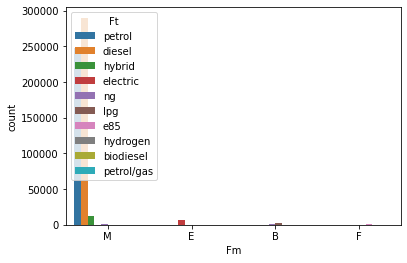

In [ ]:
sns.countplot(x='Fm',hue='Ft',data=dfF);

In [ ]:
#Pour variables avec peu de NaN(<10%) : remplacer par mediane 
for var in ['m','W','At1','At2','ec']:
  dfF[var]=dfF[var].fillna(dfF[var].median())


In [ ]:
(dfF.isna().sum())/dfF.shape[0]

Cn           0.000000
Ct           0.000000
m            0.000000
Mt           0.691594
Enedc        0.071763
Ewltp        0.679002
W            0.000000
At1          0.000000
At2          0.000000
Ft           0.000000
Fm           0.000000
ec           0.000000
ep           0.228387
Z            0.973239
IT           0.871842
Ernedc       0.915552
Erwltp       0.957489
De           0.980538
Status       0.000000
year         0.000000
FuelCons     0.943606
ElecRange    0.981009
grp          0.000000
dtype: float64

# Etude émissions véhicules hydrogènes et électriques 


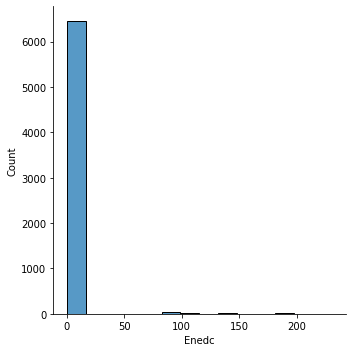

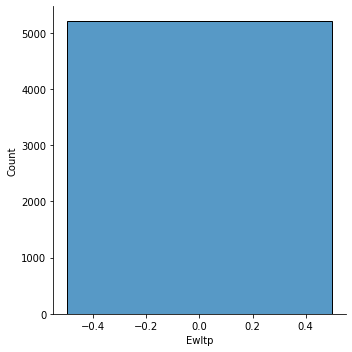

In [ ]:
sns.displot(dfF[dfF['Ft']=='electric'].Enedc);
#Vu ce graphe, il semblerait qu'il n'y a que très peu de véhicules éléctriques dont les émissions de CO2 sont non nulles d'après le protocole Enedc
#On peut imaginer qu'il s'agit d'erreurs -> soit il s'agit de véhicules hybrides mal classés, soit il n'y a pas d'émission.
# -> Suppression des lignes Enedc electriques non nuls
#Remarque : vu que l'on étudie les émissions et que la variable cible est Ewltp ou Enedc, et qu'elle est nulle pour les véhicules électriques
#Il conviendrait de les exclure de l'étude.
sns.displot(dfF[dfF['Ft']=='electric'].Ewltp);

In [ ]:
#Information confirmée par l'étude de ces quelques lignes : 
dfF[(dfF['Ft']=='electric')&(dfF['Enedc']!=0)].head(10)
#On peut, grâce au nom commercial(Cn), déduire qu'il s'agit bien de véhicules hybrides et non électriques !


,Cn,Ct,m,Mt,Enedc,Ewltp,W,At1,At2,Ft,...,Z,IT,Ernedc,Erwltp,De,Status,year,FuelCons,ElecRange,grp
73594,GOLF,M1,1257.0,NaN,109.0,0.0,2629.0,1527.0,1496.0,electric,...,127.0,NaN,NaN,NaN,NaN,F,2017,NaN,NaN,VW GROUP
155091,PRIUS,M1,1480.0,NaN,92.0,NaN,2700.0,1515.0,1510.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,TOYOTA-DAHAITSU
155291,3008HYBRID4 2.0 HDI 200 4DR AUTO,M1,1808.0,NaN,104.0,NaN,2613.0,1560.0,1560.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,STELLANTIS
155689,YARIS HYBRID,M1,1225.0,NaN,85.0,NaN,2510.0,1460.0,1469.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,TOYOTA-DAHAITSU
161952,INSIGHT,M1,1296.0,NaN,99.0,NaN,2545.0,1480.0,1470.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,HONDA
165459,CT200HEXECUTIVE 4DR AUTO,M1,1590.0,NaN,94.0,NaN,2600.0,1525.0,1520.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,TOYOTA-DAHAITSU
172091,YARIS HYBRID,M1,1225.0,NaN,85.0,NaN,2510.0,1460.0,1460.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,TOYOTA-DAHAITSU
175821,MONDEO,M1,1495.0,NaN,159.0,NaN,2850.0,1605.0,1605.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,FORD
181022,AMPERA,M1,1732.0,NaN,27.0,NaN,2685.0,1587.0,1560.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,GENERAL MOTORS
184915,TOYOTA PRIUS,M1,1460.0,NaN,89.0,NaN,2700.0,1525.0,1520.0,electric,...,NaN,NaN,NaN,NaN,NaN,F,2012,NaN,NaN,TOYOTA-DAHAITSU


In [ ]:
#On exclut les véhicules mal classés en electric (Enedc non nul)
dfF=dfF.drop(dfF[(dfF['Ft']=='electric')&(dfF['Enedc']!=0)].index)

In [ ]:
#Ewltp pour les voitures éléctriques est nul

dfF.loc[(dfF["Ft"] == "electric"), 'Ewltp']=dfF.loc[(dfF["Ft"] == "electric"), 'Ewltp'].fillna(0)

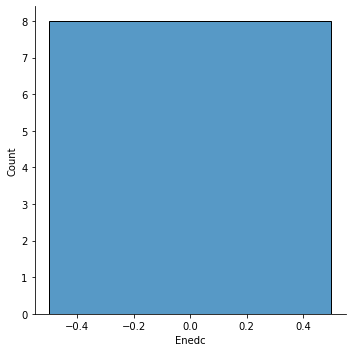

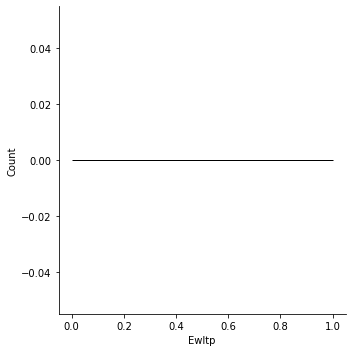

In [ ]:
#Même question pour véhicules hydrogènes ? 

sns.displot(dfF[dfF['Ft']=='hydrogen'].Enedc);
sns.displot(dfF[dfF['Ft']=='hydrogen'].Ewltp);

In [ ]:
#Ewltp pour les voitures hydrogène est nul

dfF.loc[(dfF["Ft"] == "hydrogen"), 'Ewltp']=dfF.loc[(dfF["Ft"] == "hydrogen"), 'Ewltp'].fillna(0)

# Corrélations


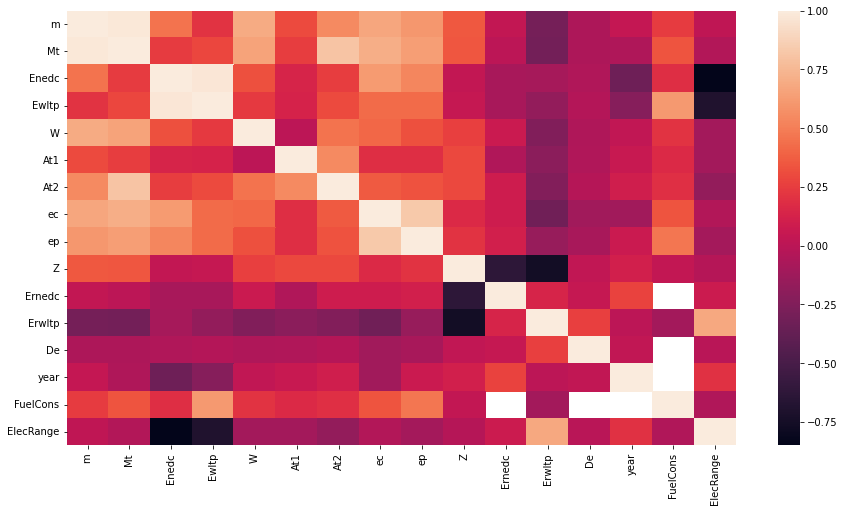

In [ ]:
# MA 25/07/2022

# correlation matrix
corr = dfF.corr()

#Heatmap
plt.figure(figsize = (15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns);

In [ ]:
corr

#Observations : 
#Très forte corrélation entre m et Mt -> N'en conserver qu'un seul ?
#Très forte corrélation entre Enedc et Ewltp 
#-> Ne conserver que Ewltp (le plus récent) avec facteur correctif sur Enedc pour remplacer valeurs manquantes ?
#Corrélation ec et ep -> remplacer valeurs manquantes de ep avec celles calculées à partir de ec ?
#Forte corrélation négative entre z et Ernedc/Erwltp


,m,Mt,Enedc,Ewltp,W,At1,At2,ec,ep,Z,Ernedc,Erwltp,De,year,FuelCons,ElecRange
m,1.000000,0.984215,0.452791,0.208934,0.695901,0.304016,0.550568,0.670450,0.608115,0.354780,0.037811,-0.299519,-0.059560,0.043068,0.245626,0.018158
Mt,0.984215,1.000000,0.242832,0.290026,0.658545,0.253194,0.806070,0.707883,0.635695,0.343179,0.005131,-0.307388,-0.061451,-0.048803,0.340137,-0.037230
Enedc,0.452791,0.242832,1.000000,0.974057,0.322826,0.138055,0.250311,0.616964,0.532620,0.033678,-0.082893,-0.085976,-0.043516,-0.325813,0.183190,-0.850602
Ewltp,0.208934,0.290026,0.974057,1.000000,0.238103,0.132012,0.303063,0.427934,0.426150,0.051082,-0.082466,-0.164047,-0.033425,-0.228275,0.611401,-0.697676
W,0.695901,0.658545,0.322826,0.238103,1.000000,0.004736,0.454345,0.408078,0.326689,0.257489,0.068386,-0.247081,-0.052606,0.029647,0.211715,-0.102745
At1,0.304016,0.253194,0.138055,0.132012,0.004736,1.000000,0.549957,0.189414,0.187489,0.297831,-0.042135,-0.200375,-0.042579,0.056134,0.168591,-0.099911
At2,0.550568,0.806070,0.250311,0.303063,0.454345,0.549957,1.000000,0.360567,0.330487,0.295547,0.083196,-0.241008,-0.023477,0.096783,0.192207,-0.170597
ec,0.670450,0.707883,0.616964,0.427934,0.408078,0.189414,0.360567,1.000000,0.832997,0.165778,0.084977,-0.316035,-0.112595,-0.112471,0.335363,-0.034512
ep,0.608115,0.635695,0.532620,0.426150,0.326689,0.187489,0.330487,0.832997,1.000000,0.207097,0.103800,-0.150839,-0.079269,0.072320,0.470275,-0.094910
Z,0.354780,0.343179,0.033678,0.051082,0.257489,0.297831,0.295547,0.165778,0.207097,1.000000,-0.630483,-0.761561,0.030283,0.105213,0.035177,-0.025956


In [ ]:
############
#### MA ####
# 25/07/22 #
############

##Premières visualisations 


#Lien entre Enedc et Ewltp 

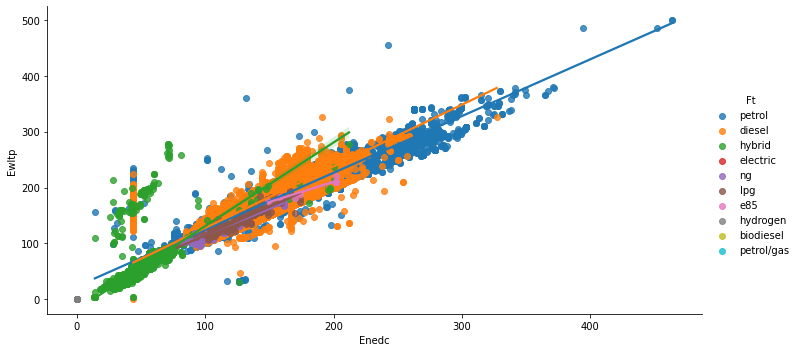

In [ ]:
sns.lmplot(x='Enedc',y='Ewltp',data=dfF,hue='Ft',height=5, aspect=2);

In [ ]:
#g = sns.FacetGrid(dfF, col='Ft', row='grp', hue='year', palette='bright');
#g.map(plt.scatter, 'Enedc', 'Ewltp');
#g.add_legend();

#On voit sur le graphe de Ewltp en fonction de Enedc qu'il y a un nuage de point un peut à part en terme de comportement
#Bien qu'il ne s'agisse que de quelques données et qu'il n'y ait pas d'influence importante sur la pente, je voudrais identifier la cause
#En traçant une grille pour visualiser les nuages de point pour chaque type de carburant et groupes automobiles :
#On voit que ce nuage "annexe" n'est pas visible pour tous les groupes.
#Il est présent pour : BMW Group petrol, diesel en 2018  
#Véhicules hybrides d'autres groupes
#                      

In [ ]:
dfCorr1=dfF.dropna(axis=0, how="any", subset=['Ewltp', 'Enedc'])

#On ne calculera le coeff que pour les types de fuel ci-dessous (voir graphe)
dfCorr1 = dfCorr1.query("Ft in ['petrol', 'diesel', 'lpg','ng','e85']")
#On exclus également les données du groupe BMW pour 2018 qui ont l'air en partie faussées 
dfCorr1 =dfCorr1[(dfCorr1['grp']!='BMW GROUP')|(dfCorr1['year']!=2018)]


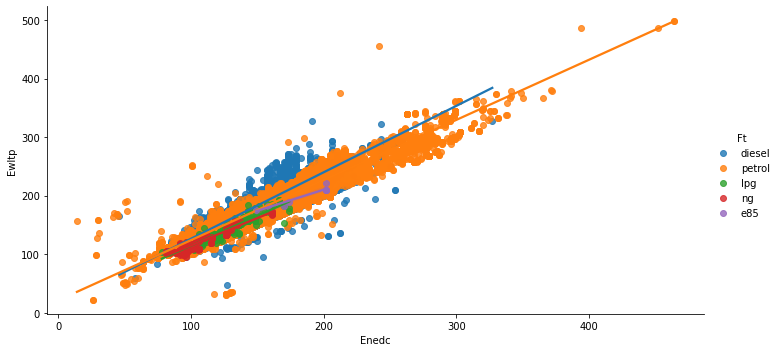

In [ ]:
sns.lmplot(x='Enedc',y='Ewltp',data=dfCorr1, hue='Ft',height=5, aspect=2);

#C'est mieux ainsi, on a quasiment plus de point dans le nuage "à part"

In [ ]:
from scipy.stats import pearsonr

test_pearson=pearsonr(dfCorr1['Enedc'],dfCorr1['Ewltp'])
print(test_pearson)

#p-value < 5% -> on rejette H0 : les variables ne sont pas indépendantes
# Coeff Pearson proche de 1 : les variables sont corrélées fortement 


(0.9522108823102261, 0.0)


In [ ]:
from scipy.stats import linregress

x=dfCorr1['Enedc']
y=dfCorr1['Ewltp']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(intercept)

1.0674321907725595
18.81274994081059


In [ ]:
dfF.loc[(dfF["Ft"] != "hybrid")&
         (dfF["Ft"] != "biodiesel"), 'Ewltp']= dfF.loc[(dfF["Ft"] != "hybrid")|
                                                       (dfF["Ft"] != "biodiesel"), 'Ewltp'].fillna(slope*(dfF['Enedc'])+intercept)
dfF.loc[(dfF["Ft"] != "hybrid")&
         (dfF["Ft"] != "biodiesel"), 'Enedc']=dfF.loc[(dfF["Ft"] != "hybrid")|
                                                      (dfF["Ft"] != "biodiesel"), 'Enedc'].fillna((dfF['Ewltp']+intercept)/slope)

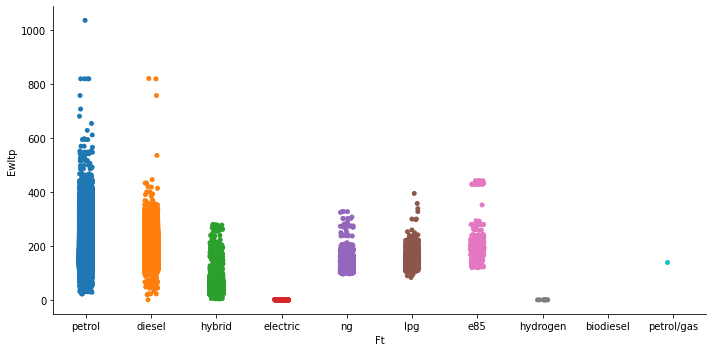

In [ ]:
sns.catplot(x='Ft', y='Ewltp',data=dfF,height=5, aspect=2);

In [ ]:
dfF=dfF.dropna(axis=0, how="any", subset=['Ewltp', 'Enedc'])

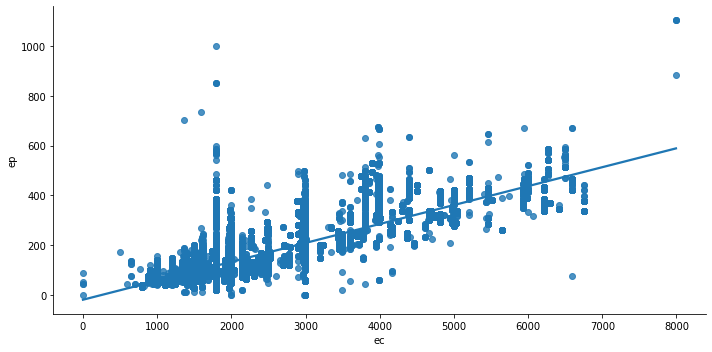

In [ ]:
sns.lmplot(x='ec',y='ep', data=dfF, height=5, aspect=2);

In [ ]:
dfCorr2=dfF.dropna(axis=0, how="any", subset=['ec', 'ep'])

In [ ]:
test_pearson=pearsonr(dfCorr2['ec'],dfCorr2['ep'])
print(test_pearson)

#p-value < 5% -> on rejette H0 : les variables ne sont pas indépendantes
# Coeff Pearson proche de 1 : les variables sont corrélées fortement 


(0.8339309250752104, 0.0)


In [ ]:
x=dfCorr2['ec']
y=dfCorr2['ep']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(intercept)

0.07610231218827734
-19.925076902882267


In [ ]:
###Remplacement des NaNs 
dfF['ep'].fillna((slope*(dfF['ec'])+intercept), inplace=True)

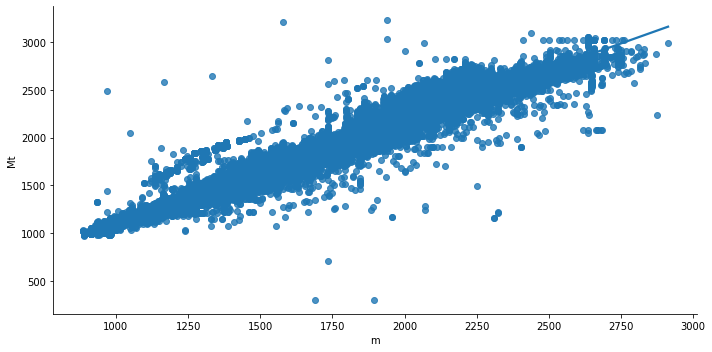

In [ ]:
sns.lmplot(x='m',y='Mt', data=dfF, height=5, aspect=2);

In [ ]:
dfCorr3=dfF.dropna(axis=0, how="any", subset=['m', 'Mt'])

In [ ]:
test_pearson=pearsonr(dfCorr3['m'],dfCorr3['Mt'])
print(test_pearson)

#p-value < 5% -> on rejette H0 : les variables ne sont pas indépendantes
# Coeff Pearson proche de 1 : les variables sont corrélées fortement 

(0.9839728096790776, 0.0)


In [ ]:
x=dfCorr3['m']
y=dfCorr3['Mt']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(intercept)

1.076834526319211
27.01929746333235


In [ ]:
###Remplacement des NaNs 
dfF['Mt'].fillna((slope*(dfF['m'])+intercept), inplace=True)

# Nettoyage des données 
### Retrait des variables et lignes liées aux véhicules électriques


In [ ]:
#On enlève les véhicules électriques et hydrogene car émission nulles
#Idem pour petrol/gas car il n'y a qu'un seul véhicule qui utilise ce type de carburant

dfF=dfF.drop(dfF[(dfF['Ft']=='electric')|
              (dfF['Ft']=='hydrogen')|
              (dfF['Ft']=='petrol/gas')].index)
dfF=dfF.drop(dfF[dfF['Fm']=='E'].index)

In [ ]:
#Suppression des variables liées à véhicule électrique

dfF=dfF.drop(columns=['Z','ElecRange'])

In [ ]:
#Supression de Mt car fortement corrélé à m et 70% de Na (donc principalement calculé à partir de m)
dfF=dfF.drop(columns=['Mt'])

In [ ]:
dfF.head()

,Cn,Ct,m,Enedc,Ewltp,W,At1,At2,Ft,Fm,ec,ep,IT,Ernedc,Erwltp,De,Status,year,FuelCons,grp
0,CAPTUR,M1,1322.0,141.285555,132.0,2639.0,1541.0,1554.0,petrol,M,1332.0,103.0,NaN,NaN,NaN,NaN,P,2021,5.8,RENAULT NISSAN
1,BERLINGO,M1,1505.0,111.000000,138.0,2785.0,1563.0,1567.0,diesel,M,1499.0,96.0,E2 29,NaN,0.7,NaN,P,2021,NaN,STELLANTIS
2,BERLINGO,M1,1595.0,158.148453,150.0,2975.0,1563.0,1577.0,diesel,M,1499.0,96.0,NaN,NaN,NaN,NaN,P,2021,NaN,STELLANTIS
3,SANDERO,M1,1111.0,130.980451,121.0,2604.0,1526.0,1520.0,petrol,M,999.0,49.0,e9 28 29,NaN,NaN,NaN,P,2021,5.4,RENAULT NISSAN
4,X5 xDrive45e,M1,2510.0,40.000000,30.0,2975.0,1678.0,1698.0,hybrid,M,2998.0,210.0,NaN,NaN,NaN,NaN,P,2021,NaN,BMW GROUP


In [ ]:
dfF.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 551344 entries, 0 to 599999
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cn        551344 non-null  object 
 1   Ct        551344 non-null  object 
 2   m         551344 non-null  float64
 3   Enedc     551344 non-null  float64
 4   Ewltp     551344 non-null  float64
 5   W         551344 non-null  float64
 6   At1       551344 non-null  float64
 7   At2       551344 non-null  float64
 8   Ft        551344 non-null  object 
 9   Fm        551344 non-null  object 
 10  ec        551344 non-null  float64
 11  ep        551344 non-null  float64
 12  IT        72052 non-null   object 
 13  Ernedc    47474 non-null   float64
 14  Erwltp    23909 non-null   float64
 15  De        10921 non-null   float64
 16  Status    551344 non-null  object 
 17  year      551344 non-null  int64  
 18  FuelCons  30525 non-null   float64
 19  grp       551344 non-null  object 
dtypes: f

# Enregistrement dataframe


In [ ]:

path = '/content/drive/MyDrive/DataScientest/Pytmosphere/Data/df_pytmosphere.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  dfF.to_csv(f)